<a href="https://colab.research.google.com/github/juacostar/AlgorithmsUN2020II/blob/master/GaleShapleyIrving/Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Laboratorio 9 Algoritmos de Gale-Shapley e Irving
* Juan Camilo Acosta Rojas

### Algoritmo de Gale-Shapley

In [1]:
%pylab inline
import pandas as pd
import numpy as np
from collections import Counter, defaultdict
from copy import copy
import random
import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


Definiendo la lista de hombre y mujeres:

In [2]:
man_list = ['a', 'b', 'c', 'd']
women_list = ['A', 'B', 'C', 'D']

In [3]:
women_df = pd.DataFrame({'A': [3,4,2,1], 'B': [3,1,4,2], 'C':[2,3,4,1], 'D':[3,2,1,4]})
women_df.index = ['a','b','c','d']

In [4]:
man_df = pd.DataFrame({'A': [1,1,2,4], 'B': [2,4,1,2], 'C':[3,3,3,3], 'D':[4,2,4,1]})
man_df.index = ['a','b','c','d']

In [5]:
man_df

,A,B,C,D
a,1,2,3,4
b,1,4,3,2
c,2,1,3,4
d,4,2,3,1


In [6]:
women_df

,A,B,C,D
a,3,3,2,3
b,4,1,3,2
c,2,4,4,1
d,1,2,1,4


In [7]:
def gale_shapley(man_list, women_list, man_df, women_df):
  # dict to control which women each man can make proposals
  women_available = {man:women_list for man in man_list}
  # waiting list of men that were able to create pair on each iteration
  waiting_list = []
  # dict to store created pairs
  proposals = {}
  # variable to count number of iterations
  count = 0
  # while not all men have pairs
  while len(waiting_list)<len(man_list):
      # man makes proposals
      for man in man_list:
          if man not in waiting_list:
              # each man make proposal to the top women from it's list
              women = women_available[man]
              best_choice = man_df.loc[man][man_df.loc[man].index.isin(women)].idxmin()
              proposals[(man, best_choice)]=(man_df.loc[man][best_choice],
                                                  women_df.loc[man][best_choice])
      # if women have more than one proposals 
      # she will choose the best option
      overlays = Counter([key[1] for key in proposals.keys()])
      # cycle to choose the best options
      for women in overlays.keys():
          if overlays[women]>1:
              # pairs to drop from proposals
              pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() 
                      if women in pair}.items(), 
                    key=lambda x: x[1][1]
                    )[1:]
              # if man was rejected by woman
              # there is no pint for him to make proposal 
              # second time to the same woman
              for p_to_drop in pairs_to_drop:
                  del proposals[p_to_drop[0]]
                  _women = copy(women_available[p_to_drop[0][0]])
                  _women.remove(p_to_drop[0][1])
                  women_available[p_to_drop[0][0]] = _women
      # man who successfully created pairs must be added to the waiting list 
      waiting_list = [man[0] for man in proposals.keys()]
      # update counter
      count+=1
  return (proposals, count)

### Mejor caso algoritmo de Gale-Shapley:

Para $n=4$

In [8]:
man_list = ['a', 'b', 'c', 'd']
women_list = ['A', 'B', 'C', 'D']
women_df = pd.DataFrame({'A': [1,2,3,4], 'B': [2,3,4,1], 'C':[3,4,1,2], 'D':[4,1,2,3]})
women_df.index = ['a','b','c','d']
man_df = pd.DataFrame({'A': [1,2,3,4], 'B': [2,3,4,1], 'C':[3,4,1,2], 'D':[4,1,2,3]})
man_df.index = ['a','b','c','d']

In [9]:
gale_shapley(man_list, women_list, man_df, women_df)[0]

{('a', 'A'): (1, 1),
 ('b', 'D'): (1, 1),
 ('c', 'C'): (1, 1),
 ('d', 'B'): (1, 1)}

In [10]:
gale_shapley(man_list, women_list, man_df, women_df)[1]

1

Para $n=40$

In [11]:
man_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'a1', 'b1', 'c1', 'd1', 'e1', 'f1', 'g1', 'h1', 'i1', 'j1', 'k1', 'l1', 'm1', 'n1', 'o1']
women_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1', 'I1', 'J1', 'K1', 'L1', 'M1', 'N1', 'O1']
women_df = pd.DataFrame({'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], 'B': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1], 'C': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2], 'D': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3], 'E': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4], 'F': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5], 'G': [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6], 'H': [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7], 'I': [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8], 'J': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'K': [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'L': [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'M': [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'N': [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 'O': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'P': [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'Q': [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 'R': [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 'S': [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], 'T': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'U': [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'V': [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], 'W': [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22], 'X': [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], 'Y': [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 'A1': [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'B1': [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26], 'C1': [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27], 'D1': [29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28], 'E1': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'F1': [31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'G1': [32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 'H1': [33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], 'I1': [34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], 'J1': [35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34], 'K1': [36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35], 'L1': [37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36], 'M1': [38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37], 'N1': [39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38], 'O1': [40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]})
women_df.index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'a1', 'b1', 'c1', 'd1', 'e1', 'f1', 'g1', 'h1', 'i1', 'j1', 'k1', 'l1', 'm1', 'n1', 'o1']
man_df = pd.DataFrame({'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], 'B': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1], 'C': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2], 'D': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3], 'E': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4], 'F': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5], 'G': [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6], 'H': [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7], 'I': [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8], 'J': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'K': [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'L': [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'M': [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'N': [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 'O': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'P': [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'Q': [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 'R': [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 'S': [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], 'T': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'U': [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'V': [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], 'W': [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22], 'X': [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], 'Y': [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 'A1': [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'B1': [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26], 'C1': [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27], 'D1': [29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28], 'E1': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'F1': [31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'G1': [32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 'H1': [33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], 'I1': [34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], 'J1': [35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34], 'K1': [36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35], 'L1': [37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36], 'M1': [38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37], 'N1': [39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38], 'O1': [40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]})
man_df.index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'a1', 'b1', 'c1', 'd1', 'e1', 'f1', 'g1', 'h1', 'i1', 'j1', 'k1', 'l1', 'm1', 'n1', 'o1']

In [12]:
women_df

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,A1,B1,C1,D1,E1,F1,G1,H1,I1,J1,K1,L1,M1,N1,O1
a,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
b,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1
c,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2
d,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3
e,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3,4
f,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3,4,5
g,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3,4,5,6
h,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3,4,5,6,7
i,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3,4,5,6,7,8
j,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3,4,5,6,7,8,9


In [13]:
man_df

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,A1,B1,C1,D1,E1,F1,G1,H1,I1,J1,K1,L1,M1,N1,O1
a,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
b,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1
c,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2
d,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3
e,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3,4
f,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3,4,5
g,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3,4,5,6
h,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3,4,5,6,7
i,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3,4,5,6,7,8
j,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,1,2,3,4,5,6,7,8,9


In [14]:
gale_shapley(man_list, women_list, man_df, women_df)[0]

{('a', 'A'): (1, 1),
 ('a1', 'P'): (1, 1),
 ('b', 'O1'): (1, 1),
 ('b1', 'O'): (1, 1),
 ('c', 'N1'): (1, 1),
 ('c1', 'N'): (1, 1),
 ('d', 'M1'): (1, 1),
 ('d1', 'M'): (1, 1),
 ('e', 'L1'): (1, 1),
 ('e1', 'L'): (1, 1),
 ('f', 'K1'): (1, 1),
 ('f1', 'K'): (1, 1),
 ('g', 'J1'): (1, 1),
 ('g1', 'J'): (1, 1),
 ('h', 'I1'): (1, 1),
 ('h1', 'I'): (1, 1),
 ('i', 'H1'): (1, 1),
 ('i1', 'H'): (1, 1),
 ('j', 'G1'): (1, 1),
 ('j1', 'G'): (1, 1),
 ('k', 'F1'): (1, 1),
 ('k1', 'F'): (1, 1),
 ('l', 'E1'): (1, 1),
 ('l1', 'E'): (1, 1),
 ('m', 'D1'): (1, 1),
 ('m1', 'D'): (1, 1),
 ('n', 'C1'): (1, 1),
 ('n1', 'C'): (1, 1),
 ('o', 'B1'): (1, 1),
 ('o1', 'B'): (1, 1),
 ('p', 'A1'): (1, 1),
 ('q', 'Y'): (1, 1),
 ('r', 'X'): (1, 1),
 ('s', 'W'): (1, 1),
 ('t', 'V'): (1, 1),
 ('u', 'U'): (1, 1),
 ('v', 'T'): (1, 1),
 ('w', 'S'): (1, 1),
 ('x', 'R'): (1, 1),
 ('y', 'Q'): (1, 1)}

In [15]:
gale_shapley(man_list, women_list, man_df, women_df)[1]

1

### Peores casos algoritmo de Gale-Shapley:

Para $n=4$

In [16]:
man_list = ['a', 'b', 'c', 'd']
women_list = ['A', 'B', 'C', 'D']
women_df = pd.DataFrame({'A': [4,1,2,3], 'B': [3,4,1,2], 'C':[2,3,4,1], 'D':[1,2,3,4]})
women_df.index = ['a','b','c','d']
man_df = pd.DataFrame({'A': [1,3,2,1], 'B': [2,1,3,2], 'C':[3,2,1,3], 'D':[4,4,4,4]})
man_df.index = ['a','b','c','d']

In [17]:
gale_shapley(man_list, women_list, man_df, women_df)[0]

{('a', 'D'): (4, 1),
 ('b', 'A'): (3, 1),
 ('c', 'B'): (3, 1),
 ('d', 'C'): (3, 1)}

In [18]:
gale_shapley(man_list, women_list, man_df, women_df)[1]

10

Para $n=40$

### Algoritmo de Irving

In [19]:
def get_ranking_matrix(preference):
    rank = [[None for j in range(len(preference))] for i in range(len(preference))]

    for i in range(len(preference)):
        for j in range(len(preference[i])):
            rank[i][preference[i][j]] = j
    
    return rank

def stable_roommates_phase_1(preference, rank):
    proposal = [None for x in range(len(preference))]
    first = [0 for x in range(len(preference))]
    last = [len(x) for x in preference]
    to_process = [x for x in range(len(preference))]
    
    while len(to_process) > 0:
        i = to_process[0]
        
        # update first pointer if necessary
        while preference[i][first[i]] == None:
            first[i] += 1
            
        top_pick = preference[i][first[i]]
        
        # top pick hasn't been proposed to yet, so they accept
        if proposal[top_pick] == None:
            proposal[top_pick] = i
            
            match_rank = preference[top_pick].index(i)
            
            # all candidates worse than i are rejected, must remove top_pick from their preference list
            for x in range(match_rank+1, last[top_pick]):
                reject = preference[top_pick][x]
                preference[reject][rank[reject][top_pick]] = None
            
            # update last pointer
            last[top_pick] = match_rank
            del to_process[0]
            
            continue
        
        curr_match_idx = rank[top_pick][proposal[top_pick]]
        potential_match_idx = rank[top_pick][i]
        
        if curr_match_idx < potential_match_idx: # current matching is preferred, i is rejected
            preference[top_pick][potential_match_idx] = None
            
            first[i] += 1 # start at next spot
            
            continue
        else: # accept proposal, so old match has to return to their preference list again
            preference[top_pick][curr_match_idx] = None
            
            # old match is rejected by top_pick, must update their list
            top_pick_idx = rank[proposal[top_pick]][top_pick]
            preference[proposal[top_pick]][top_pick_idx] = None
            
            del to_process[0]
            # add old match to to_process
            to_process.insert(0, proposal[top_pick])
            
            proposal[top_pick] = i
            last[top_pick] = potential_match_idx
    
    return first, last, preference

def clean_preferences(first, last, preferences):
    for i in range(len(preferences)):
        for j in range(len(preferences[i])):
            if j < first[i] or j > last[i]:
                preferences[i][j] = None

    return preferences

def find_second_favorite(i, first, last, pref):
    count = 0
    for j in range(first[i], last[i]+1):
        if not pref[j] == None:
            count += 1
        elif count == 0:
            first[i] += 1
        if count == 2:
            return pref[j]
    return None

def find_rotation(i, p, q, first, last, preferences):
    second_favorite = find_second_favorite(p[i], first, last, preferences[p[i]])
    next_p = preferences[second_favorite][last[second_favorite]]
    
    if next_p in p:
        # rotation found!
        j = p.index(next_p)
        q[j] = second_favorite
                
        return p[j:], q[j:]

    q.append(second_favorite)
    p.append(next_p)
    return find_rotation(i+1, p, q, first, last,  preferences)

def eliminate_rotation(p, q, first, last, preferences, rank):
    for i in range(len(p)):
        # q_i rejects p_i so that p_i proposes to q_i+1
        preferences[p[i]][rank[p[i]][q[i]]] = None
        
        # all successors of p_i-1 are removed from q_i's list, and q_i is removed from their lists
        for j in range(rank[q[i]][p[i-1]]+1, last[q[i]]):
            reject = rank[q[i]].index(j) #preferences[q[i]][j]
            preferences[reject][rank[reject][q[i]]] = None
            
        last[q[i]] = rank[q[i]][p[i-1]]

def stable_roommates_phase_2(first, last, preferences, rank):
    while True:
        p, q = None, None
        # find first p_0 to get a rotation from
        # preference list of p_0 must contain at least 2 elements
        for i in range(len(preferences)):
            if last[i] - first[i] > 0 and find_second_favorite(i, first, last, preferences[i]) != None:
                p, q = find_rotation(0, [i], [None], first, last, preferences)
                break
        
        if not p and not q:
            return preferences
        
        # eliminate rotation
        eliminate_rotation(p, q, first, last, preferences, rank)

def match_roommates(preferences):
    rank = get_ranking_matrix(preferences)
    first, last, preferences = stable_roommates_phase_1(preferences, rank)
    stable_roommates_phase_2(first, last, preferences, rank)
    clean_preferences(first, last, preferences)
    
    matches = []
    length = len(preferences)
    visited = set()
    i = 0
    
    for i in range(len(preferences)):
        if not i in visited:
            pair = (i, preferences[i][last[i]])
            visited.add(last[i])
            matches.append(pair)
    
    return matches

### Mejores casos Algoritmo de Irving:

In [20]:
# preferences = [[0,1,2,3], [1,2,3,0], [2,3,0,1], [3,0,1,2],[0,1,2,3]]

# print(match_roommates(preferences))
preferences = [[2, 3, 1, 5, 4], [5, 4, 3, 0, 2], [1, 3, 4, 0, 5], [4, 1, 2, 5, 0], [2, 0, 1, 3, 5], [4, 0, 2, 3, 1]]
# preferences = [[0,1,2,3], [1,2,3,0], [2,3,0,1], [3,0,1,2]]
print(match_roommates(preferences))

[(0, 5), (1, 3), (4, 2), (5, 0)]


### Mejores casos algoritmo de Stable Marriage:

Para $n=4$:

In [21]:
# Python3 program for stable marriage problem 
  
# Number of Men or Women 
N = 4
  
# This function returns true if  
# woman 'w' prefers man 'm1' over man 'm' 
def wPrefersM1OverM(prefer, w, m, m1,n): 
      
    # Check if w prefers m over her  
    # current engagment m1 
    for i in range(n): 
          
        # If m1 comes before m in lisr of w,  
        # then w prefers her current engagement, 
        # don't do anything 
        if (prefer[w][i] == m1): 
            return True
  
        # If m cmes before m1 in w's list,  
        # then free her current engagement  
        # and engage her with m 
        if (prefer[w][i] == m): 
            return False
  
# Prints stable matching for N boys and N girls.  
# Boys are numbered as 0 to N-1.  
# Girls are numbereed as N to 2N-1. 
def stableMarriage(prefer,n): 
      
    # Stores partner of women. This is our output  
    # array that stores paing information.  
    # The value of wPartner[i] indicates the partner  
    # assigned to woman N+i. Note that the woman numbers  
    # between N and 2*N-1. The value -1 indicates  
    # that (N+i)'th woman is free 
    wPartner = [-1 for i in range(n)] 
  
    # An array to store availability of men.  
    # If mFree[i] is false, then man 'i' is free, 
    # otherwise engaged. 
    mFree = [False for i in range(n)] 
  
    freeCount = n
  
    # While there are free men 
    while (freeCount > 0): 
          
        # Pick the first free man (we could pick any) 
        m = 0
        while (m < n): 
            if (mFree[m] == False): 
                break
            m += 1
  
        # One by one go to all women according to  
        # m's preferences. Here m is the picked free man 
        i = 0
        while i < n and mFree[m] == False: 
            w = prefer[m][i] 
  
            # The woman of preference is free,  
            # w and m become partners (Note that  
            # the partnership maybe changed later).  
            # So we can say they are engaged not married 
            if (wPartner[w - n] == -1): 
                wPartner[w - n] = m 
                mFree[m] = True
                freeCount -= 1
  
            else:  
                  
                # If w is not free 
                # Find current engagement of w 
                m1 = wPartner[w - n] 
  
                # If w prefers m over her current engagement m1, 
                # then break the engagement between w and m1 and 
                # engage m with w. 
                if (wPrefersM1OverM(prefer, w, m, m1,n) == False): 
                    wPartner[w - n] = m 
                    mFree[m] = True
                    mFree[m1] = False
            i += 1
  
            # End of Else 
        # End of the for loop that goes  
        # to all women in m's list 
    # End of main while loop 
  
    # Prthe solution 
    print("Woman ", " Man") 
    for i in range(n): 
        print(i + n, "\t", wPartner[i]) 
  
# Driver Code 
prefer = [[1, 2, 3, 4], [1, 2, 3, 4], 
          [1, 2, 3, 4], [1, 2, 3, 4],
          [1, 2, 3, 4], [1, 2, 3, 4],
          [1, 2, 3, 4], [1, 2, 3, 4]]
  
stableMarriage(prefer,4) 
  

Woman   Man
4 	 0
5 	 1
6 	 2
7 	 3


Para $n=40$:

In [22]:
# Driver Code 
preferido = [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]]
  
stableMarriage(preferido,40) 

Woman   Man
40 	 0
41 	 1
42 	 2
43 	 3
44 	 4
45 	 5
46 	 6
47 	 7
48 	 8
49 	 9
50 	 10
51 	 11
52 	 12
53 	 13
54 	 14
55 	 15
56 	 16
57 	 17
58 	 18
59 	 19
60 	 20
61 	 21
62 	 22
63 	 23
64 	 24
65 	 25
66 	 26
67 	 27
68 	 28
69 	 29
70 	 30
71 	 31
72 	 32
73 	 33
74 	 34
75 	 35
76 	 36
77 	 37
78 	 38
79 	 39


### Corriendo el algoritmo de Gale-Shapley 100 veces:

Para $n=4$

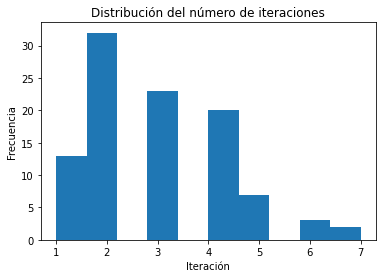

Mínima iteración 1
Máxima iteración 7
Número de iteraciones promedio 2.93


In [23]:
man_list = ['a', 'b', 'c', 'd']
women_list = ['A', 'B', 'C', 'D']
women_df = pd.DataFrame({'A': [1,2,3,4], 'B': [2,1,3,4], 'C':[3,2,4,1], 'D':[4,3,1,2]})
women_df.index = ['a','b','c','d']
man_df = pd.DataFrame({'A': [1,2,3,4], 'B': [1,2,3,4], 'C':[2,3,4,1], 'D':[3,4,1,2]})
man_df.index = ['a','b','c','d']
n = 100
def gale_shapley_random(man_list, women_list, man_df, women_df,listIndex,n):
  dicWomen = defaultdict()
  dicMan = defaultdict()
  lista = []
  iterations = []
  for l in range(n):
    for i in women_list:
      for j in range(len(women_list)):
        lista.append(random.randint(1,n+1))
      dicWomen[i] = lista
      lista = []
    women_df = pd.DataFrame(dicWomen)
    women_df.index = listIndex
    for i in women_list:
      for j in range(len(women_list)):
        lista.append(random.randint(1,n+1))
      dicMan[i] = lista
      lista = []
    man_df = pd.DataFrame(dicMan)
    man_df.index = listIndex
    iterations.append(gale_shapley(man_list, women_list, man_df, women_df)[1])
  fig = plt.figure()
  plt.title("Distribución del número de iteraciones")
  plt.hist(iterations)
  plt.xlabel("Iteración")
  plt.ylabel("Frecuencia")
  plt.show()
  print("Mínima iteración", min(iterations))
  print("Máxima iteración", max(iterations))
  print("Número de iteraciones promedio", sum(iterations)/len(iterations))

gale_shapley_random(man_list, women_list, man_df, women_df,man_list,n)

Para $n=40$

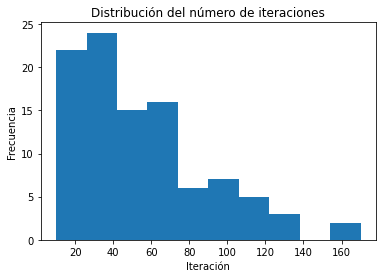

Mínima iteración 10
Máxima iteración 170
Número de iteraciones promedio 54.01


In [24]:
man_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'a1', 'b1', 'c1', 'd1', 'e1', 'f1', 'g1', 'h1', 'i1', 'j1', 'k1', 'l1', 'm1', 'n1', 'o1']
women_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1', 'I1', 'J1', 'K1', 'L1', 'M1', 'N1', 'O1']
women_df = pd.DataFrame({'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], 'B': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1], 'C': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2], 'D': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3], 'E': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4], 'F': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5], 'G': [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6], 'H': [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7], 'I': [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8], 'J': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'K': [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'L': [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'M': [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'N': [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 'O': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'P': [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'Q': [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 'R': [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 'S': [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], 'T': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'U': [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'V': [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], 'W': [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22], 'X': [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], 'Y': [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 'A1': [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'B1': [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26], 'C1': [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27], 'D1': [29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28], 'E1': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'F1': [31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'G1': [32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 'H1': [33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], 'I1': [34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], 'J1': [35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34], 'K1': [36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35], 'L1': [37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36], 'M1': [38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37], 'N1': [39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38], 'O1': [40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]})
women_df.index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'a1', 'b1', 'c1', 'd1', 'e1', 'f1', 'g1', 'h1', 'i1', 'j1', 'k1', 'l1', 'm1', 'n1', 'o1']
man_df = pd.DataFrame({'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], 'B': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1], 'C': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2], 'D': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3], 'E': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4], 'F': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5], 'G': [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6], 'H': [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7], 'I': [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8], 'J': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'K': [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'L': [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'M': [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'N': [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 'O': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'P': [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'Q': [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 'R': [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 'S': [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], 'T': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'U': [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'V': [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], 'W': [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22], 'X': [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], 'Y': [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 'A1': [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'B1': [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26], 'C1': [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27], 'D1': [29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28], 'E1': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'F1': [31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'G1': [32, 33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], 'H1': [33, 34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], 'I1': [34, 35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], 'J1': [35, 36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34], 'K1': [36, 37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35], 'L1': [37, 38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36], 'M1': [38, 39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37], 'N1': [39, 40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38], 'O1': [40, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]})
man_df.index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'a1', 'b1', 'c1', 'd1', 'e1', 'f1', 'g1', 'h1', 'i1', 'j1', 'k1', 'l1', 'm1', 'n1', 'o1']
n=100
gale_shapley_random(man_list, women_list, man_df, women_df,man_list,n)